In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
metal = 'K'
embed_dict_path = f"../data/{metal}_train_embeddings.pkl"

In [3]:
from k2 import K2Processor

In [4]:
args = {"datatype":"protein",
        "k":15,
        "quantizer_type":"kmeans",
        "embeddings_path":embed_dict_path,
        "embeddings_type":"dict",
        "mapping_path": None,
        "sample_size":4440,
        "sample_scheme":"random",
        "dataset_path":"/home/data/tinycam/train/train.hdf5",
        "verbosity": "full",
        "so_dict_path": None}
proc = K2Processor(args)

Embeddings path provided, loading embeddings...


In [5]:
proc.fit_quantizer()

Chosen KMeans model for quantization...


sampled 690 known salient objects!
total embeds: 165676
collapsing from dim 512 --> 2


/oak/stanford/groups/rbaltman/aderry/miniconda3/envs/collapse3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


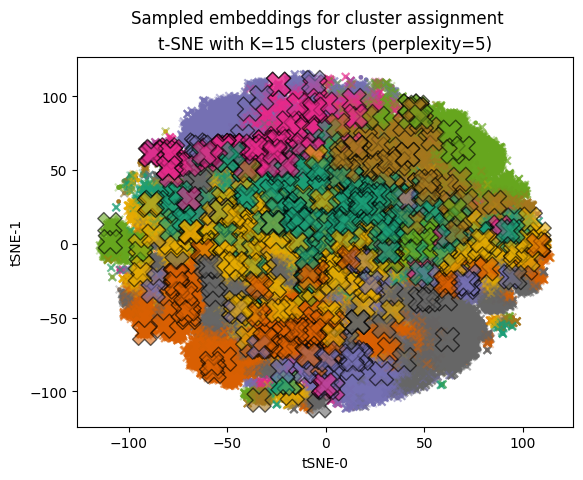

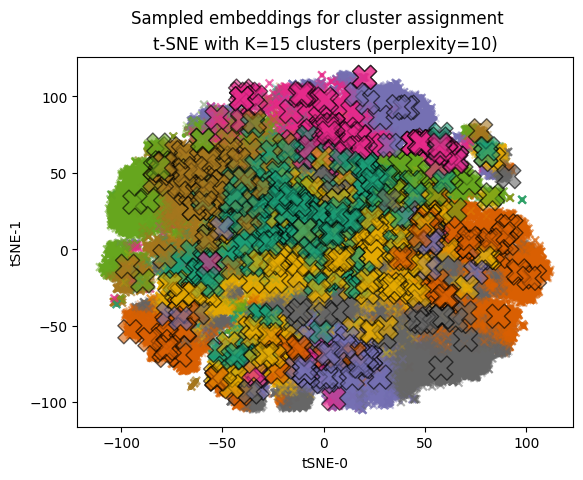

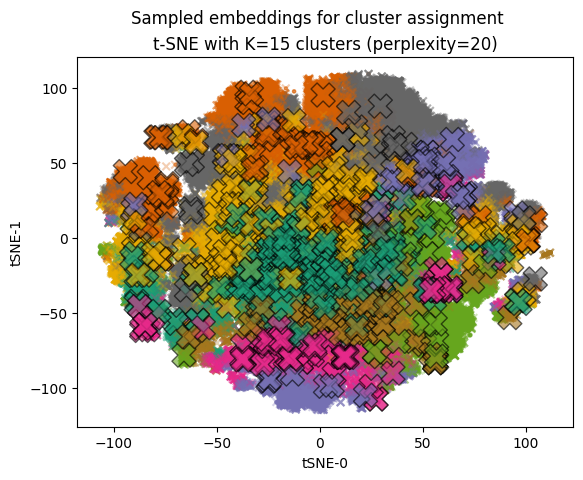

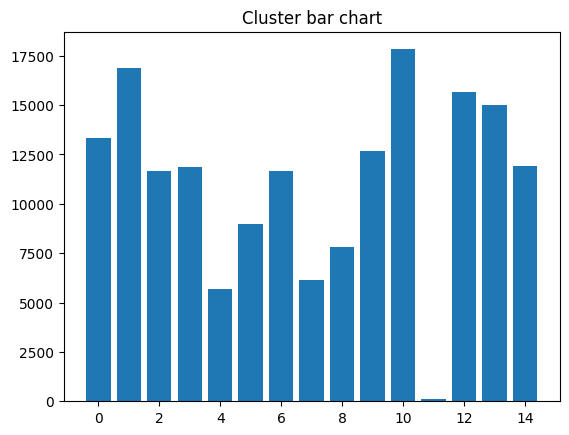

In [10]:
proc.visualize_quantizer()

# Sprite construction

In [6]:
metal = 'K'
G_dir = f"../data/{metal}_train_graphs"

In [7]:
import nglview

In [8]:
import utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import networkx as nx

Graph with 552 nodes and 2792 edges


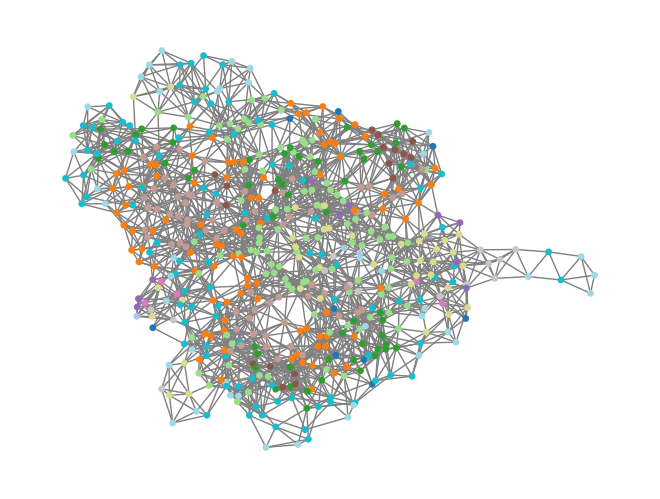

In [9]:
G_id = "1aozB"
G_path = G_dir + "/" + G_id + ".pkl"
G = utils.deserialize(G_path)

sprite = utils.construct_sprite(G, proc)
print(sprite)
utils.visualize_sprite(sprite, modality="graph")

In [49]:
# nglview.show_file(f'/scratch/users/aderry/pdb/{G_id[1:3]}/{G_id}.ent.gz', ext='.ent.gz', compressed=True)
view = utils.visualize_protein_sprite(sprite)
view

NGLWidget()

In [ ]:
(structure id, model id, chain id, residue id, atom name, altloc)

In [12]:
nx.get_node_attributes(sprite, 'resid').values()

dict_values(['S1', 'Q2', 'I3', 'R4', 'H5', 'Y6', 'K7', 'W8', 'E9', 'V10', 'E11', 'Y12', 'M13', 'F14', 'W15', 'A16', 'P17', 'N18', 'C19', 'N20', 'E21', 'N22', 'I23', 'V24', 'M25', 'G26', 'I27', 'N28', 'G29', 'Q30', 'F31', 'P32', 'G33', 'P34', 'T35', 'I36', 'R37', 'A38', 'N39', 'A40', 'G41', 'D42', 'S43', 'V44', 'V45', 'V46', 'E47', 'L48', 'T49', 'N50', 'K51', 'L52', 'H53', 'T54', 'E55', 'G56', 'V57', 'V58', 'I59', 'H60', 'W61', 'H62', 'G63', 'I64', 'L65', 'Q66', 'R67', 'G68', 'T69', 'P70', 'W71', 'A72', 'D73', 'G74', 'T75', 'A76', 'S77', 'I78', 'S79', 'Q80', 'C81', 'A82', 'I83', 'N84', 'P85', 'G86', 'E87', 'T88', 'F89', 'F90', 'Y91', 'N92', 'F93', 'T94', 'V95', 'D96', 'N97', 'P98', 'G99', 'T100', 'F101', 'F102', 'Y103', 'H104', 'G105', 'H106', 'L107', 'G108', 'M109', 'Q110', 'R111', 'S112', 'A113', 'G114', 'L115', 'Y116', 'G117', 'S118', 'L119', 'I120', 'V121', 'D122', 'P123', 'P124', 'Q125', 'G126', 'K127', 'K128', 'E129', 'P130', 'F131', 'H132', 'Y133', 'D134', 'G135', 'E136', 'I137',

In [27]:
from k2 import K2Model

In [128]:
# # hyperparameter sweep
# Ks = [10,15,20,25,30]
# rs = [0,1,2,4,8]
# alphas = [0.01, 0.025, 0.05, 1e10]
# taus = [0,1,2]

In [42]:
# label_dict = utils.deserialize("/home/data/tinycam/train/" + modelstr + "-label_dict.pkl")
hparams = {"alpha": 0.01, "tau": 1, "lambda": 0.5}
args = {"modality":"graph",
        "processor":proc,
        "r":2,
        "variant": "inferential",
        "hparams": hparams,
        "train_graph_path": G_dir}

In [47]:
k2m = K2Model(args)

In [48]:
k2m.create_train_array()

Creating K2 training array...:   0%|          | 0/454 [00:00<?, ?it/s]

Complete! Created a training array for few-shot classification...
Number of training examples: 454
Number of Kk features: 135


In [44]:
from utils import deserialize
import os
g = deserialize(os.path.join(args['train_graph_path'], '1ad1B.pkl'))
print(g)
print(g.graph)
g = deserialize(os.path.join(args['train_graph_path'], '1bpjA.pkl'))
print(g)
print(g.graph)

Graph with 251 nodes and 1238 edges
{'d': 512, 'id': '1ad1B', 'label': 1}
Graph with 269 nodes and 1345 edges
{'d': 512, 'id': '5d3kA', 'label': 0}


In [49]:
k2m.fit_kernel()

Normalizing training data with TF-IDF...
Differential Expression with alpha,tau: 0.01,1
[0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 1 1 0

<BarContainer object of 135 artists>

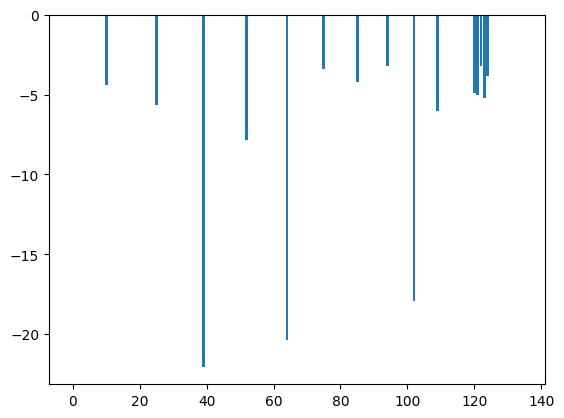

In [50]:
plt.bar(x=range(len(k2m.B)), height=list(k2m.B))

In [51]:
test_graph_path = '../data/K_test_graphs'
G = deserialize(os.path.join(test_graph_path, '1bpjA.pkl'))
P = k2m.prospect(G)
print(P)

Graph with 316 nodes and 1462 edges


Displaying motif graph with log10 scaling


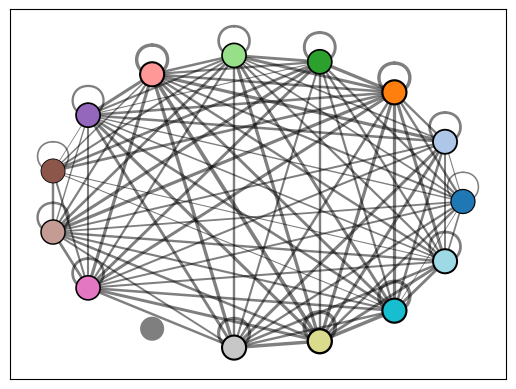

In [52]:
k2m.visualize_motif_graph(G)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


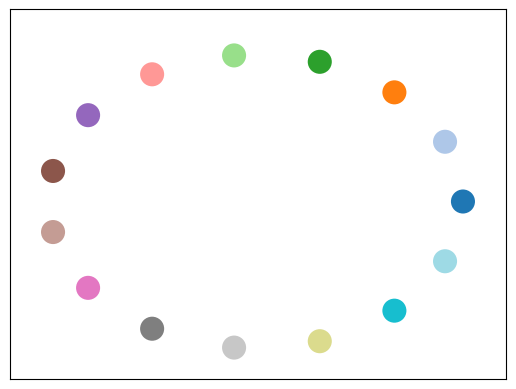

In [53]:
k2m.visualize_motif_graph()

-311.44445224969337 108.37879594798613


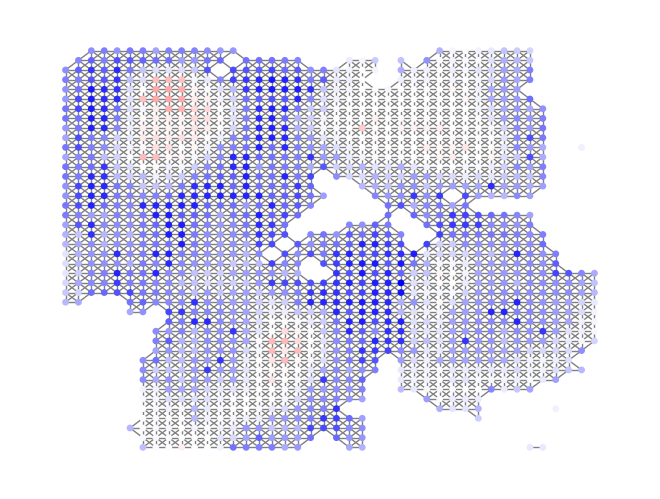

In [157]:
k2m.visualize_prospect_graph(P)

-311.44445224969337 108.37879594798613
311.44445224969337


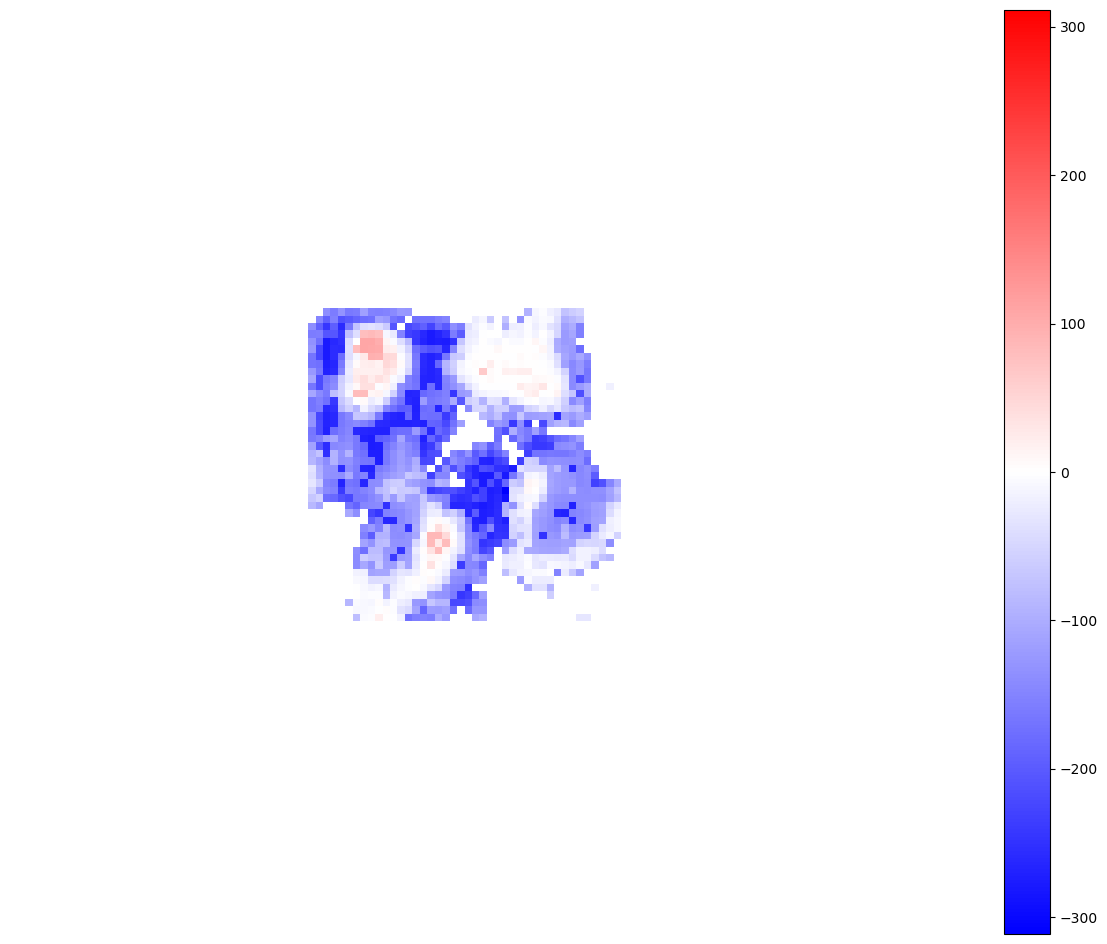

In [154]:
k2m.visualize_prospect_map(P)